In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import numpy
import re

## 1. Total de casos por semana

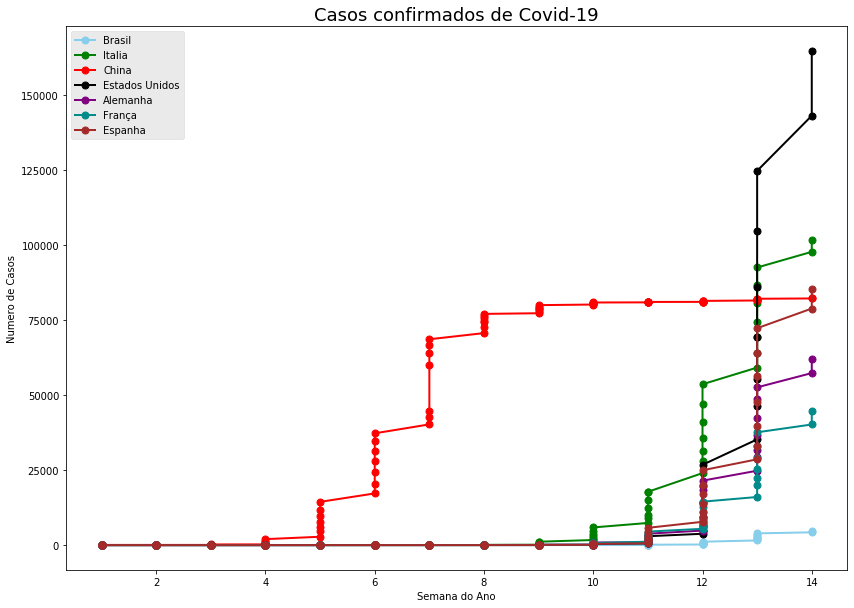

In [2]:
#Importa dados mundiais
arquivo = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
casostot = pd.read_csv(arquivo, header=0)
#space
casostot.columns = casostot.columns.str.replace(' ', '')
#data
casostot['date'] = pd.to_datetime(casostot['date'])
#variavel
casostot['week'] = casostot.date.dt.weekofyear
#declara semana como index
casostot.set_index('week', inplace=True)
#Isola as colunas dos países
b = casostot.Brazil
i = casostot.Italy
c = casostot.China
e = casostot.UnitedStates
g = casostot.Germany
f = casostot.France
es = casostot.Spain
#Total de casos
b2 = pd.DataFrame(b)
i2 = pd.DataFrame(i)
c2 = pd.DataFrame(c)
e2 = pd.DataFrame(e)
g2 = pd.DataFrame(g)
f2 = pd.DataFrame(f)
es2 = pd.DataFrame(es)
#Total de Casos
%matplotlib inline
plt.figure(figsize=(14,10))
plt.title('Casos confirmados de Covid-19', fontdict={'fontsize':18})
plt.plot(b2, data=b2, marker='.',  markersize=14, color='skyblue', linewidth=2, label="Brasil")
plt.plot(i2, data=i2,marker='.',  markersize=14, color='green', linewidth=2, label="Italia" )
plt.plot(c2, data=c2,marker='.',  markersize=14, color='red', linewidth=2, label="China" )
plt.plot(e2, data=e2,marker='.',  markersize=14, color='black', linewidth=2, label="Estados Unidos" )
plt.plot(g2, data=g2,marker='.',  markersize=14, color='purple', linewidth=2, label="Alemanha" )
plt.plot(f2, data=f2,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="França" )
plt.plot(es2, data=es2,marker='.',  markersize=14, color='brown', linewidth=2, label="Espanha" )
plt.style.use('ggplot')
plt.xlabel('Semana do Ano')
plt.ylabel('Numero de Casos')
plt.legend()
plt.savefig('casossemana.png', format='png')

## 1. Total de casos por Dia

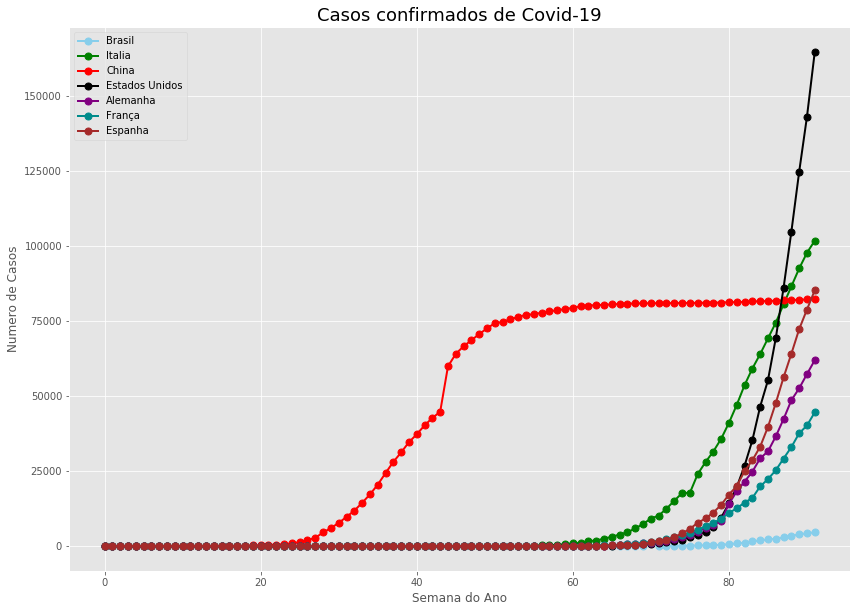

In [3]:
arquivo = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
casosdia = pd.read_csv(arquivo, header=0)
casosdia.columns = casosdia.columns.str.replace(' ', '')
casosdia['date'] = pd.to_datetime(casosdia['date'])
b = casosdia.Brazil
i = casosdia.Italy
c = casosdia.China
e = casosdia.UnitedStates
g = casosdia.Germany
f = casosdia.France
es = casosdia.Spain
b2 = pd.DataFrame(b)
i2 = pd.DataFrame(i)
c2 = pd.DataFrame(c)
e2 = pd.DataFrame(e)
g2 = pd.DataFrame(g)
f2 = pd.DataFrame(f)
es2 = pd.DataFrame(es)
%matplotlib inline
plt.figure(figsize=(14,10))
plt.title('Casos confirmados de Covid-19', fontdict={'fontsize':18})
plt.plot(b2, data=b2, marker='.',  markersize=14, color='skyblue', linewidth=2, label="Brasil")
plt.plot(i2, data=i2,marker='.',  markersize=14, color='green', linewidth=2, label="Italia" )
plt.plot(c2, data=c2,marker='.',  markersize=14, color='red', linewidth=2, label="China" )
plt.plot(e2, data=e2,marker='.',  markersize=14, color='black', linewidth=2, label="Estados Unidos" )
plt.plot(g2, data=g2,marker='.',  markersize=14, color='purple', linewidth=2, label="Alemanha" )
plt.plot(f2, data=f2,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="França" )
plt.plot(es2, data=es2,marker='.',  markersize=14, color='brown', linewidth=2, label="Espanha" )
plt.style.use('ggplot')
plt.xlabel('Semana do Ano')
plt.ylabel('Numero de Casos')
plt.legend()
plt.savefig('casossemana.png', format='png')

## 2. Total de mortes por semana

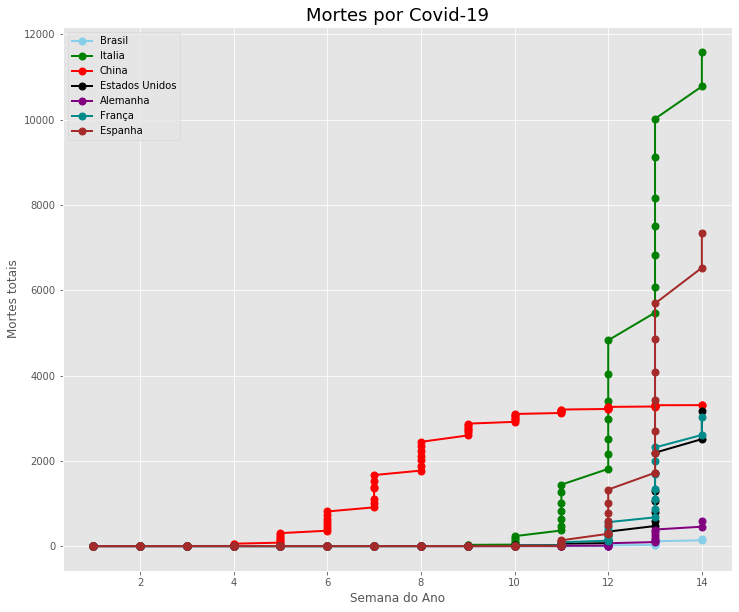

In [4]:
arquivo = 'https://covid.ourworldindata.org/data/ecdc/total_deaths.csv'
morte = pd.read_csv(arquivo, header=0)
morte.columns = morte.columns.str.replace(' ', '')
morte['date'] = pd.to_datetime(morte['date'])
morte['week'] = morte.date.dt.weekofyear
morte.set_index('week', inplace=True)
ir1 = morte.Iran
b1 = morte.Brazil
i1 = morte.Italy
c1 = morte.China
e1 = morte.UnitedStates
g1 = morte.Germany
f1 = morte.France
es1 = morte.Spain
ir11 = pd.DataFrame(ir1)
b11 = pd.DataFrame(b1)
i11 = pd.DataFrame(i1)
c11 = pd.DataFrame(c1)
e11 = pd.DataFrame(e1)
g11 = pd.DataFrame(g1)
f11 = pd.DataFrame(f1)
es11 = pd.DataFrame(es1)
%matplotlib inline
plt.figure(figsize=(12,10))
plt.title('Mortes por Covid-19', fontdict={'fontsize':18})
plt.plot(b11, data=b11, marker='.',  markersize=14, color='skyblue', linewidth=2, label="Brasil")
plt.plot(i11, data=i11,marker='.',  markersize=14, color='green', linewidth=2, label="Italia" )
plt.plot(c11, data=c11,marker='.',  markersize=14, color='red', linewidth=2, label="China" )
plt.plot(e11, data=e11,marker='.',  markersize=14, color='black', linewidth=2, label="Estados Unidos" )
plt.plot(g11, data=g11,marker='.',  markersize=14, color='purple', linewidth=2, label="Alemanha" )
plt.plot(f11, data=f11,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="França" )
plt.plot(es11, data=es11,marker='.',  markersize=14, color='brown', linewidth=2, label="Espanha" )
#plt.plot(ir11, data=ir11,marker='.',  markersize=14, color='gray', linewidth=2, label="Iran" )
plt.style.use('ggplot')
plt.xlabel('Semana do Ano')
plt.ylabel('Mortes totais')
plt.legend()
plt.savefig('Mortessemana.png', format='png')


## 2. Total de mortes por Dia

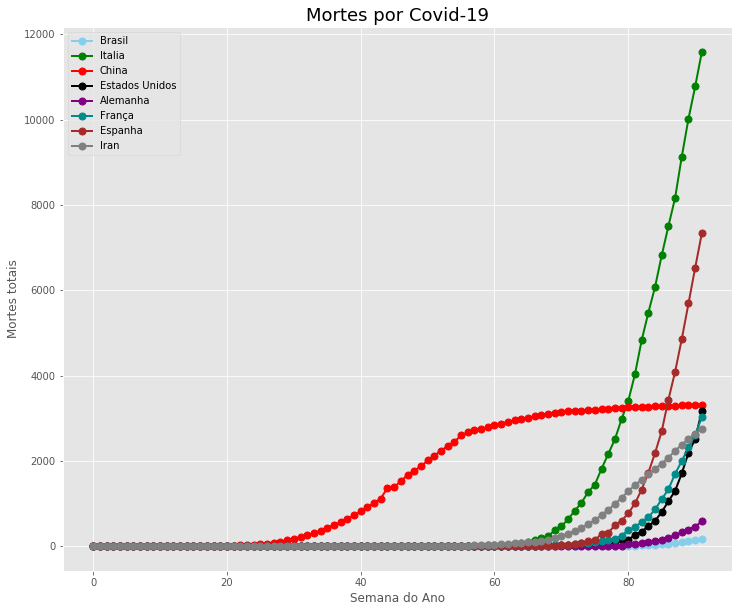

In [5]:
arquivo = 'https://covid.ourworldindata.org/data/ecdc/total_deaths.csv'
morte = pd.read_csv(arquivo, header=0)
morte.columns = morte.columns.str.replace(' ', '')
morte['date'] = pd.to_datetime(morte['date'])
ir12 = morte.Iran
b12 = morte.Brazil
i12 = morte.Italy
c12 = morte.China
e12 = morte.UnitedStates
g12 = morte.Germany
f12 = morte.France
es12 = morte.Spain
ir111 = pd.DataFrame(ir12)
b111 = pd.DataFrame(b12)
i111 = pd.DataFrame(i12)
c111 = pd.DataFrame(c12)
e111 = pd.DataFrame(e12)
g111 = pd.DataFrame(g12)
f111 = pd.DataFrame(f12)
es111 = pd.DataFrame(es12)
%matplotlib inline
plt.figure(figsize=(12,10))
plt.title('Mortes por Covid-19', fontdict={'fontsize':18})
plt.plot(b111, data=b111, marker='.',  markersize=14, color='skyblue', linewidth=2, label="Brasil")
plt.plot(i111, data=i111,marker='.',  markersize=14, color='green', linewidth=2, label="Italia" )
plt.plot(c111, data=c111,marker='.',  markersize=14, color='red', linewidth=2, label="China" )
plt.plot(e111, data=e111,marker='.',  markersize=14, color='black', linewidth=2, label="Estados Unidos" )
plt.plot(g111, data=g111,marker='.',  markersize=14, color='purple', linewidth=2, label="Alemanha" )
plt.plot(f111, data=f111,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="França" )
plt.plot(es111, data=es111,marker='.',  markersize=14, color='brown', linewidth=2, label="Espanha" )
plt.plot(ir111, data=ir111,marker='.',  markersize=14, color='gray', linewidth=2, label="Iran" )

plt.style.use('ggplot')
plt.xlabel('Semana do Ano')
plt.ylabel('Mortes totais')
plt.legend()
plt.savefig('Mortessemana.png', format='png')




# Corona Casos mundiais



In [6]:
mundo = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(mundo, header=0)
df['date'] = pd.to_datetime(df['date'])
df['week'] = df.date.dt.weekofyear
df.location = df.location.str.replace(' ', '')
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,week
0,2019-12-31,Afghanistan,0,0,0,0,1
1,2020-01-01,Afghanistan,0,0,0,0,1
2,2020-01-02,Afghanistan,0,0,0,0,1
3,2020-01-03,Afghanistan,0,0,0,0,1
4,2020-01-04,Afghanistan,0,0,0,0,1


## Brasil por dia

C:\Users\Andre G\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


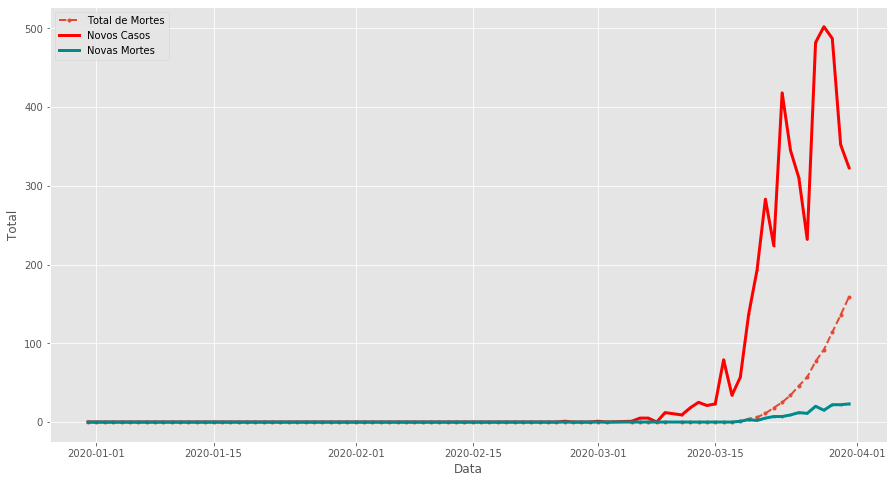

In [7]:
%matplotlib inline
br = df[df.location=='Brazil']
br.set_index('date', inplace=True)
plt.figure(figsize=(15,8))
tc = br.total_cases
td = br.total_deaths
nc = br.new_cases
nm = br.new_deaths
#plt.plot( tc, data=tc, marker='.', markerfacecolor='skyblue', markersize=2, color='skyblue', linewidth=3, label="Total de Casos")
plt.plot( td, data=td, marker='.', linewidth=2, linestyle='dashed', label="Total de Mortes")
plt.plot( nc, data=nc, marker='.', markersize=2, color='red', linewidth=3, label="Novos Casos")
plt.plot( nm, data=nm, marker='.', markersize=2, color='darkcyan', linewidth=3, label="Novas Mortes")
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Total')
plt.legend()

## Total Estados Unidos por dia

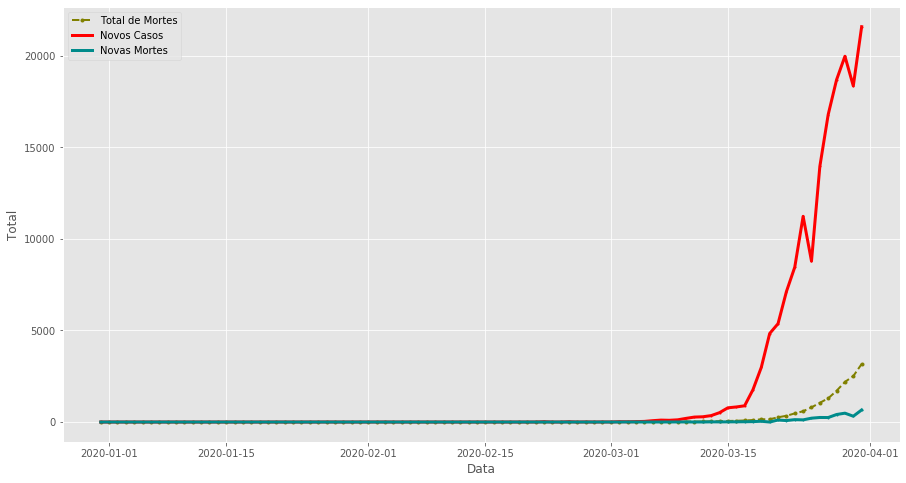

In [8]:
%matplotlib inline
us = df[df.location=='UnitedStates']
us.set_index('date', inplace=True)
plt.figure(figsize=(15,8))
tce = us.total_cases
tde = us.total_deaths
nce = us.new_cases
nme = us.new_deaths
#plt.plot( tce, data=tce, marker='.', markerfacecolor='skyblue', markersize=2, color='skyblue', linewidth=3, label="Total de Casos")
plt.plot( tde, data=tde, marker='.', color='olive', linewidth=2, linestyle='dashed', label="Total de Mortes")
plt.plot( nce, data=nce, marker='.', markersize=2, color='red', linewidth=3, label="Novos Casos")
plt.plot( nme, data=nme, marker='.', markersize=2, color='darkcyan', linewidth=3, label="Novas Mortes")
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Total')
plt.legend()

### *Total de casos no mundo por dia*

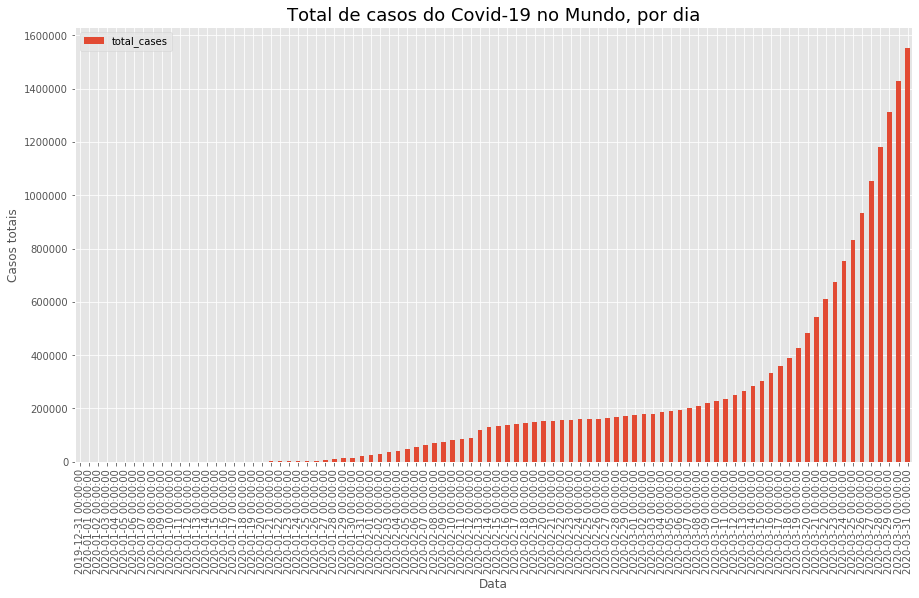

In [9]:
%matplotlib inline
plt.figure(figsize=(15,8))
df.groupby(df.date).total_cases.sum().plot.bar()
plt.title('Total de casos do Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Casos totais')
plt.legend()
plt.savefig('CasosMundo.png', format='png')


### *Total de novos casos por dia*

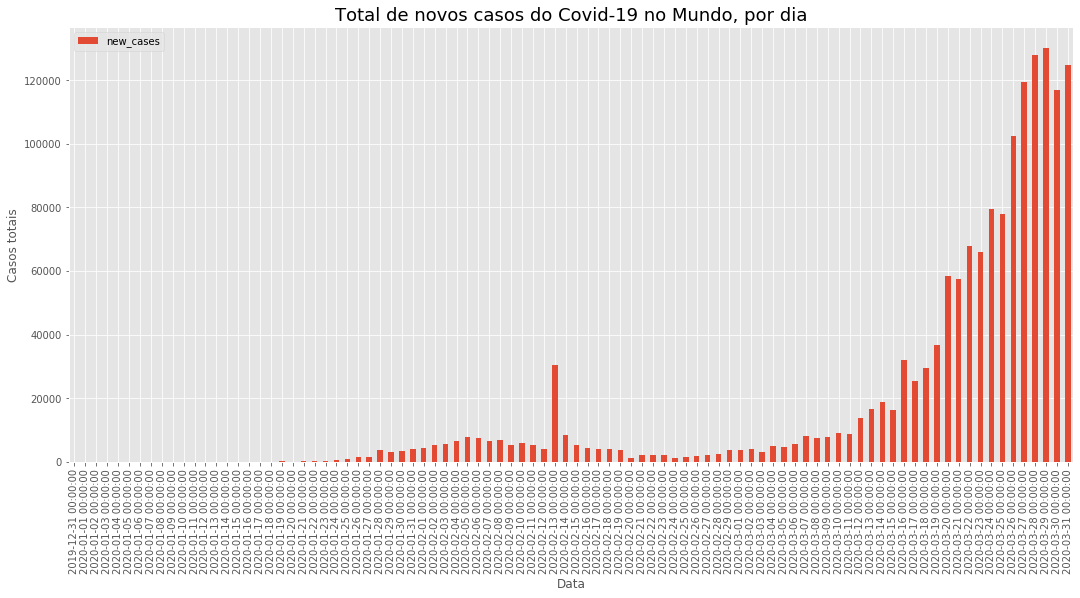

In [10]:
%matplotlib inline
plt.figure(figsize=(18,8))
df.groupby(df.date).new_cases.sum().plot.bar()
plt.title('Total de novos casos do Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Casos totais')
plt.legend()
plt.savefig('novoscasosdia.png', format='png')

### *Total novas mortes por dia*

In [ ]:
%matplotlib inline

plt.figure(figsize=(15,8))
df.groupby(df.date).new_deaths.sum().plot.bar()
plt.title('Novas mortes por Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.legend()
plt.savefig('novasmoetesdia.png', format='png')


### *Total de mortes no mundo por dia*

In [ ]:
%matplotlib inline
plt.figure(figsize=(17,8))
df.groupby(df.date).total_deaths.sum().plot.bar()
plt.title('Total de mortes do Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Casos totais')
plt.legend()
plt.savefig('totalmortesdia.png', format='png')